# Логистическая регрессия

## Данные

Однажды был проведён такой эксперимент - на 5000 участниках проверяли, как возраст и физическое здоровье влияют на потерю слуха, особенно на способность слышать высокие тона. Результаты этого эксперимента находятся в .csv-файле. У каждого участника есть возраст, оценка его физического здоровья, и результат аудио-теста (прошёл/не прошёл), проверяющего способность слышать высокие частоты. Сможем ли мы построить модель, которая будет предсказывать способность человека слышать высокие тона звука, основываясь только на его возрасте и физическом здоровье?

* Признаки

    * age - возраст участников, в годах
    * physical_score - оценка физического здоровья, полученная в результате физических тестов

* Целевая переменная (Label/Target)

    * test_result - 0 если аудио-тест не пройден, 1 если аудио-тест пройден

##  <span style="color:blue">Загружаем библиотеки</span>

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay


##  <span style="color:blue">Загружаем данные</span>

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


### Анализ и визуализация данных



In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


Изучим распределение значений целевой переменной

In [5]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

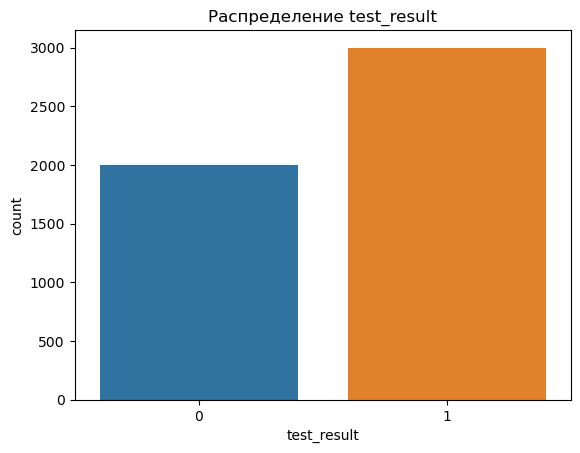

In [8]:
sns.countplot(data = df, x = 'test_result').set (title='Распределение test_result');

Изучим распределение признаков, чтобы понять, зависит ли test_result от (1) age и (2) physical_score

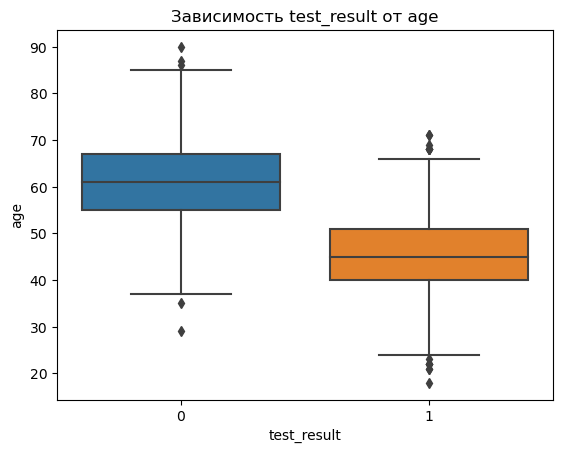

In [9]:
sns.boxplot(data = df, x = 'test_result', y = 'age').set (title='Зависимость test_result от age');

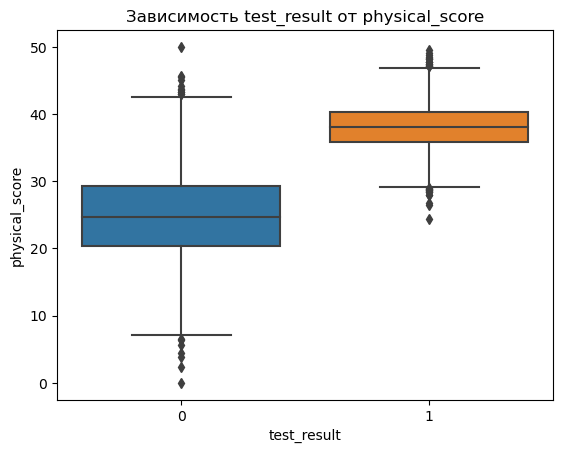

In [10]:
sns.boxplot(data = df, x = 'test_result', y = 'physical_score').set (title='Зависимость test_result от physical_score');

Видим четкую зависимость: те, кто <span style="color:blue">не прошел</span> тест, в среднем <span style="color:red">старше</span> и имеют <span style="color:red">меньше physical_score</span> чем те, кто <span style="color:blue">прошел</span>

Теперь посмотрим, как связаны age и physical_score между собой

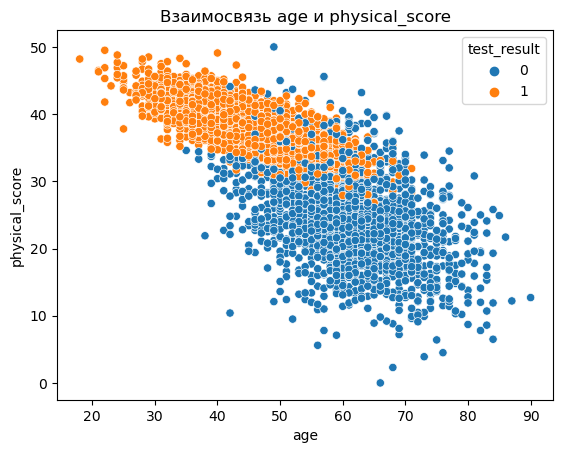

In [12]:
sns.scatterplot(x = 'age', y = 'physical_score', 
                data = df, 
                hue = 'test_result').set(title = 'Взаимосвязь age и physical_score');


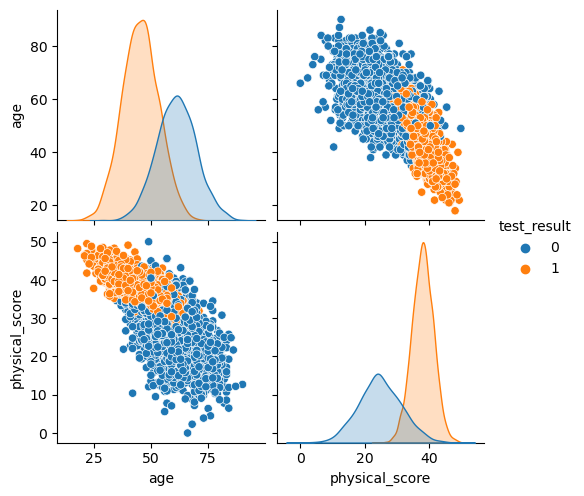

In [14]:
sns.pairplot(df, hue = 'test_result');

Обра признака имеют <span style="color:blue">нормальное</span> распределение

Видим, что чем больше <span style="color:blue">age</span>, тем <span style="color:blue">physical_score</span> становится меньше. 

Полученные кластеры показывают, что <span style="color:blue">молодые участники</span> <span style="color:red">лучше</span> проходят тест.

[Text(0.5, 1.0, 'Корреляция признаков с целевой переменной')]

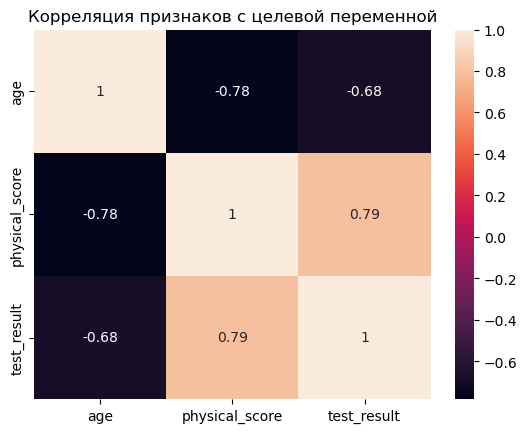

In [15]:
sns.heatmap(df.corr(), annot = True).set(title = 'Корреляция признаков с целевой переменной')

Признак <span style="color:blue">physical_score</span> имеет значительную <span style="color:red">положительную</span> , а <span style="color:blue">age</span> значительную <span style="color:red">отрицателную</span>  корреляцию с test_result

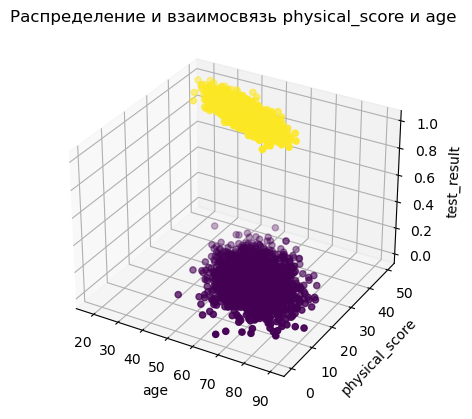

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c = df['test_result'])

ax.set_xlabel("age")
ax.set_ylabel("physical_score")
ax.set_zlabel("test_result")
plt.title("Распределение и взаимосвязь physical_score и age");

## Cоздание и обучение модели

отделям целевую переменную от признаков

In [21]:
X = df.drop('test_result', axis = 1)
y = df['test_result']

Масштабируем признаки


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [23]:
scaler = StandardScaler()

In [24]:
sc_X_train = scaler.fit_transform(X_train)

In [25]:
sc_X_test = scaler.transform(X_test)

Создаем модель логистической регрессии

In [26]:
log_model = LogisticRegression()

In [27]:
log_model.fit(sc_X_train, y_train)

LogisticRegression()

Изучим атрибуты

1) коэффициенты для age и physical_score

In [28]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

Применим модель для тестовых данных

In [29]:
y_pred = log_model.predict(sc_X_test)

Значения целевой переменной

In [30]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

Можем рассчитать вероятность принадлежности к классу 0/ 1

In [31]:
y_pred_proba = log_model.predict_proba(sc_X_test)

In [32]:
y_pred_proba


array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

## Оценка работы модели

Расчет коэффициентов

In [33]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

Первый коэффициент принадлежит <span style="color:blue">age</span> второй <span style="color:blue">Physical_score</span>

<span style="color:blue">Отрицательное</span> значение для age значит чем больше возраст, тем меньше вероятность класса 1
<span style="color:blue">Положительное</span> значение для Physical_score значит, что чем лучше физ форма, тем выше вероятность успешного прохождения

Величина коэффициента свидетельствует о том, что <span style="color:blue">physical_score</span> влияет <span style="color:blue">сильнее</span>, то есть является <span style="color:red">существенным признаком</span>, влияющий на целевую переменную

Вычисление метрик (accurance, confusion_matrix, classification_report)

Для вычисления метрик производим сравнение результатов пробного набора с тестовыми данными

In [34]:
y_pred = log_model.predict(sc_X_test)

<span style="color:green">Accurancy</span>

In [35]:
accuracy_score(y_test, y_pred)

0.93

Если мы рассматриваем только признаки age и physical_score, то в 93% случаев наша модель выдает правильное предсказание

<span style="color:green">Confusion matrix</span>

In [37]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

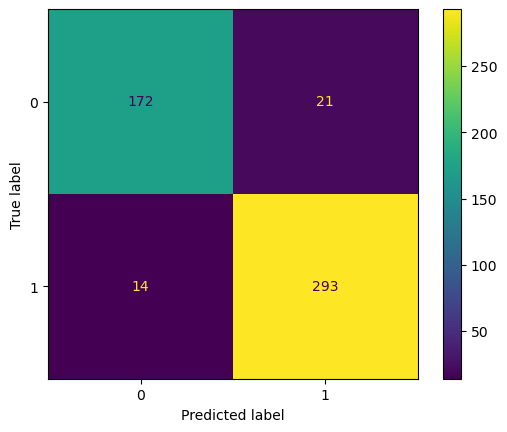

In [44]:
ConfusionMatrixDisplay.from_estimator(log_model, sc_X_test, y_test);

<span style="color:green">Precision score, recall score</span>

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



<span style="color:blue">recall</span> - как часто мы находим значение этого класса из всего набора значений этого класса

<span style="color:blue">precision</span> - как часто мы классифицируем случаи этого класса из всего набора значений этого класса

<span style="color:blue">f-1</span> - гармоническое среднее, между precision и recall

<span style="color:blue">support</span> - это количество случае в том или ином классе


Видно, что в нашем случае классы хорошо сбалансированы (193 случая для класса ноль и 307 - для класса один)

<span style="color:blue">Accuracy</span> для каждого из 2х классов близка к общей метрике accuracy для всех 500 случаев. Это значит, что мы можем использовать метрику accuracy для оценки для нашей модели в целом, так как у нас отсутствует дисбаланс для какого-то отдельного класса.

<span style="color:blue">Macro_avg</span> - это обычное усреднение
<span style="color:blue">Weighted</span> - это усреднее взвешенное с учетом случаев в каждом классе

Эти метрики полезны, когда у нас несбалансированные классы, но в нашем случае они сбалансированы, поэтому эти метрики равны друг другу

Если хотим вычислить метрики отдельно, то можно написать следующее, однако стоит помнить, что это не для отдельно для каждого класса, а в целом для всей модели:

In [48]:
precision_score(y_test, y_pred)

0.9331210191082803

In [49]:
recall_score(y_test, y_pred)

0.9543973941368078

<span style="color:green">ROC и Recall кривая</span>

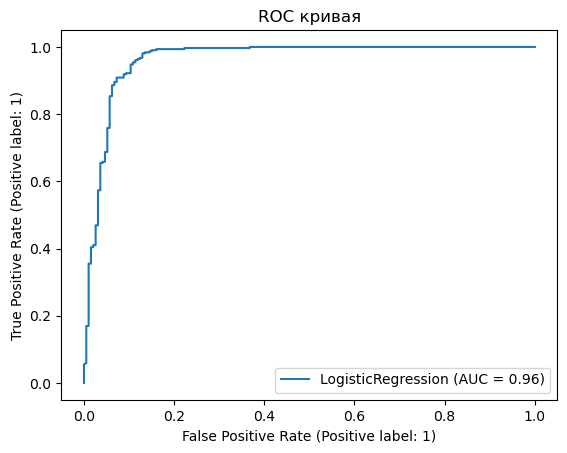

In [57]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(log_model, sc_X_test, y_test, ax = ax)
ax.set_title('ROC кривая');

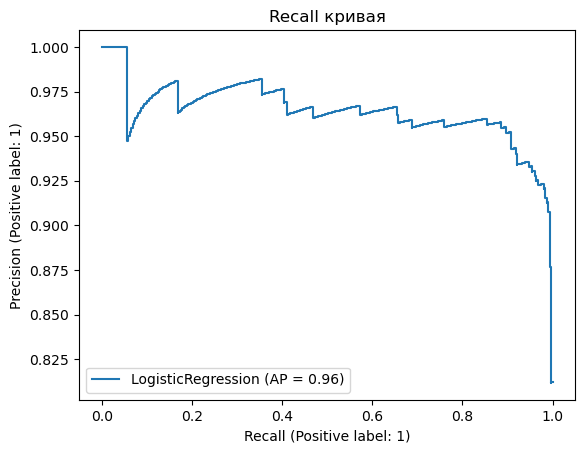

In [58]:
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_estimator(log_model, sc_X_test, y_test, ax = ax)
ax.set_title('Recall кривая');

Позволяет понять баланс между precision и recall

<span style="color:green">Вероятности для каждого класса</span>

In [59]:
log_model.predict_proba(sc_X_test)

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

Насколько наша модель уверена в своих предсказаниях

In [60]:
print(f'предсказанное значение для нулевого значения {log_model.predict_proba(sc_X_test)[0]}')
print(f'реального значение для нулевого значения {y_test[0]}')
print(f'чтобы получить само предсказание {log_model.predict(sc_X_test)[0]}')


предсказанное значение для нулевого значения [0.02384343 0.97615657]
реального значение для нулевого значения 1
чтобы получить само предсказание 1


Если истинное значение это 1 а наша модель с вероятностью 97% предсказывает класс 1, а класс 0 с вероятностью 2,3%